<a href="https://colab.research.google.com/github/sreent/machine-learning/blob/main/Principle%20Component%20Analysis/PCA%20Slides%20PlotKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PCA Explainer — Plotly Edition (with **Baseline Projection**)

Adds a clean **projection plot** where the projected points lie on a baseline (\(y=0\)) —
matching your attached style. Also keeps the previous interactive figures.


In [1]:

import numpy as np
from math import cos, sin, radians
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(7)


In [2]:

def rot2d(theta_deg: float):
    t = radians(theta_deg)
    R = np.array([[cos(t), -sin(t)],
                  [sin(t),  cos(t)]])
    return R

def gen_2d_data(n=1000, base_scales=(1.8, 0.5), base_angle_deg=135, noise=0.1):
    D = np.diag(base_scales)
    R = rot2d(base_angle_deg)
    Sigma = R @ (D @ D.T) @ R.T + (noise**2) * np.eye(2)
    X = np.random.multivariate_normal(mean=np.zeros(2), cov=Sigma, size=n)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

def center(X):
    mu = X.mean(axis=0, keepdims=True)
    return X - mu, mu

def pca_svd(Xc):
    U, S, Vt = np.linalg.svd(Xc, full_matrices=False)
    return U, S, Vt

def angle_to_vec(theta_deg: float):
    t = radians(theta_deg)
    v = np.array([cos(t), sin(t)], dtype=float)
    return v / np.linalg.norm(v)

def project_onto(Xc, v):
    v = v / np.linalg.norm(v)
    z = Xc @ v
    Xproj = np.outer(z, v)
    resid = Xc - Xproj
    return z, Xproj, resid

def variance_along(Xc, v):
    z, _, _ = project_onto(Xc, v)
    n = len(z)
    return (z**2).sum() / (n - 1)

def mse_reconstruction(Xc, v):
    _, _, resid = project_onto(Xc, v)
    return (resid**2).sum(axis=1).mean()



## Generate data & PCA


In [3]:
#X = gen_2d_data(n=100, base_scales=(1.8, 0.5), base_angle_deg=135, noise=0.1)
#Xc, mu = center(X)
#U, S, Vt = pca_svd(Xc)
#V = Vt.T


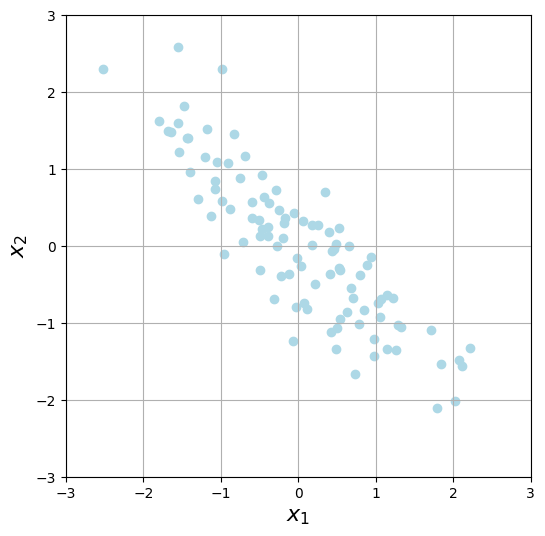

In [84]:
#def gen_2d_data(n=1000, base_scales=(1.8, 0.5), base_angle_deg=135, noise=0.1):
#    D = np.diag(base_scales)
#    R = rot2d(base_angle_deg)
#    Sigma = R @ (D @ D.T) @ R.T + (noise**2) * np.eye(2)
#    X = np.random.multivariate_normal(mean=np.zeros(2), cov=Sigma, size=n)
#
#    scaler = StandardScaler()
#    X = scaler.fit_transform(X)
#    return X

X = gen_2d_data(n=100, base_scales=(1.8, 0.5), base_angle_deg=135, noise=0.1)

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], color='lightblue', marker='o')
plt.axis([-3, 3, -3, 3])
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.grid()
plt.show()

In [78]:
def angle_to_vec(theta_deg: float):
    t = radians(theta_deg)
    v = np.array([cos(t), sin(t)], dtype=float)
    return v / np.linalg.norm(v)

In [79]:
samples = np.random.choice(len(X), size=5, replace=False)
X_samp = X[samples, :]

In [80]:
theta_deg = 360
u = angle_to_vec(theta_deg)

X_proj = np.zeros(X_samp.shape)
for i in range(X_samp.shape[0]) :
  X_proj[i,:] = np.dot(u, X_samp[i,:])*u

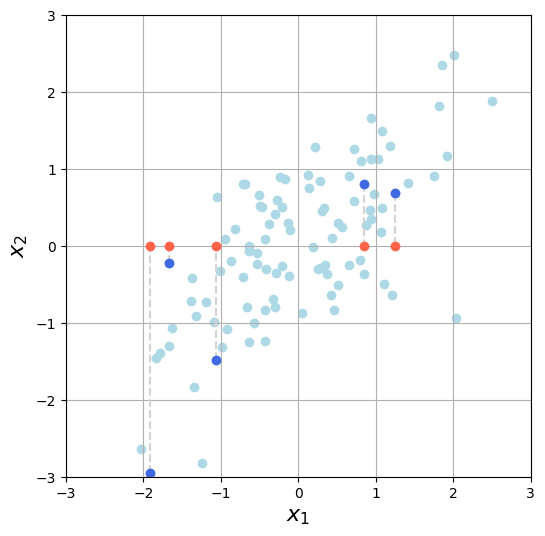

In [81]:
plt.figure(figsize=(6, 6))

plt.scatter(X[:,0], X[:,1], color='lightblue', marker='o')

for i in range(X_samp.shape[0]) :
  plt.plot([X_samp[i,0], X_proj[i,0]],
           [X_samp[i,1], X_proj[i,1]], color='lightgray', linestyle='dashed')
  plt.plot(X_samp[i,0], X_samp[i,1], color='royalblue', marker='o')
  plt.plot(X_proj[i,0], X_proj[i,1], color='tomato', marker='o')

plt.axis([-3, 3, -3, 3])
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.grid()
plt.show()

Standard Deviation:  1.0


<>:12: SyntaxWarning: invalid escape sequence '\c'
<>:12: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-253634062.py:12: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('$p_1$ ($\\theta=315^\circ$)', fontsize=16)


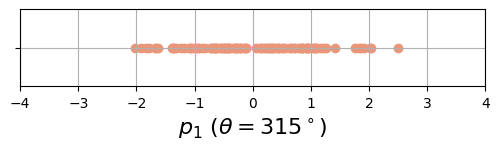

In [82]:
X_proj = np.zeros((X.shape[0],1))
for i in range(X.shape[0]) :
  X_proj[i] = np.dot(u, X[i,:])

print('Standard Deviation: ', np.std(X_proj))

plt.figure(figsize=(6, 1))
plt.scatter(X_proj, 0*X_proj, color='darksalmon', marker='o')
plt.yticks(ticks=[0], labels=[''])
plt
plt.axis([-4, 4, -1, 1])
plt.xlabel('$p_1$ ($\\theta=315^\circ$)', fontsize=16)
plt.ylabel('')
plt.grid()
plt.show()

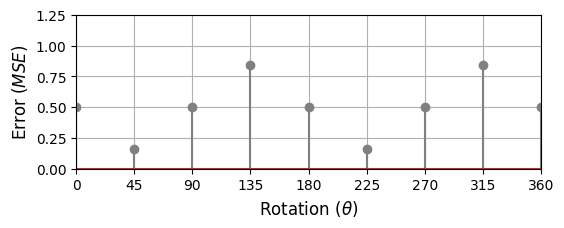

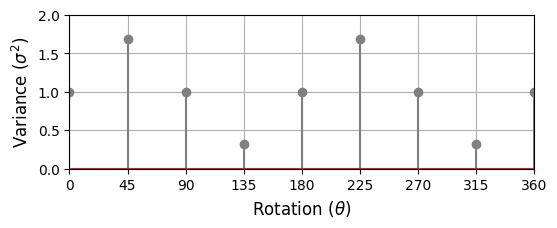

In [83]:
angles = []
errors = []
variances = []
sweep_angles = np.arange(0, theta_deg+1, 45)
for angle in sweep_angles :
  u = angle_to_vec(angle)

  proj = np.zeros((X.shape[0],1))
  X_proj = np.zeros((X.shape))
  for i in range(X.shape[0]) :
    #print(proj[i])
    proj[i] = np.dot(u, X[i,:])
    #print(proj[i])
    X_proj[i,:] = proj[i]*u

  errors.append(np.mean((X - X_proj)**2))
  variances.append(proj.var())
  angles.append(angle)

plt.figure(figsize=(6, 2))
#plt.stem(angles[:-1], errors[:-1], linefmt='gray')
plt.stem(angles, errors, linefmt='gray')

#plt.stem(angles[-1], errors[-1], linefmt='tomato')
plt.grid()
plt.xticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
plt.axis([0, 360, 0, 1.25])
plt.xlabel('Rotation ($\\theta$)', fontsize=12)
plt.ylabel('Error ($MSE$)', fontsize=12)
plt.show()

plt.figure(figsize=(6, 2))
#plt.stem(angles[:-1], variances[:-1], linefmt='gray')
plt.stem(angles, variances, linefmt='gray')

#plt.stem(angles[-1], variances[-1], linefmt='tomato')
plt.grid()
plt.xticks([0, 45, 90, 135, 180, 225, 270, 315, 360])
plt.axis([0, 360, 0, 2])
plt.xlabel('Rotation ($\\theta$)', fontsize=12)
plt.ylabel('Variance ($\\sigma^2$)', fontsize=12)
plt.show()

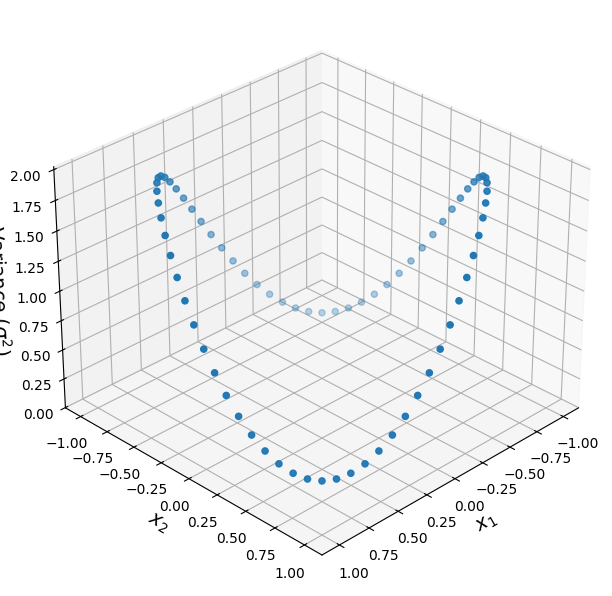

In [147]:
thetas = np.arange(0, 360, 5)

variances = []
for theta in thetas :
  w = angle_to_vec(theta)
  variances.append([w[0], w[1], variance_along(X, w)])

variances = np.array(variances)

fig = plt.figure(figsize=(6,6), constrained_layout=True)   # or: plt.figure(layout='constrained')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(variances[:,0], variances[:,1], variances[:,2])
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('Variance ($\\sigma^2$)', fontsize=14)
ax.view_init(azim=45)
fig.canvas.draw()                       # ensure positions are computed
ax.zaxis.set_label_coords(0.92, 0.5)    # < 1.0 moves it left into the frame
plt.show()

In [ ]:
thetas = np.arange(0, 360, 5)

variances = []
for theta in thetas :
  w = angle_to_vec(theta)
  variances.append([w[0], w[1], variance_along(X, w)])

variances = np.array(variances)

fig = plt.figure(figsize=(6,6), constrained_layout=True)   # or: plt.figure(layout='constrained')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(variances[:,0], variances[:,1], variances[:,2])
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('Variance ($\\sigma^2$)', fontsize=14)
fig.canvas.draw()                       # ensure positions are computed
ax.zaxis.set_label_coords(0.92, 0.5)    # < 1.0 moves it left into the frame
plt.show()

In [189]:
Xc, mu = center(X)
U, S, Vt = pca_svd(Xc)
V = Vt.T


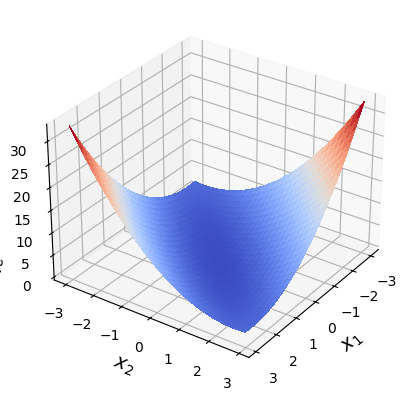

In [140]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

# Make data.
W1 = np.arange(-3, 3, 0.1)
W2 = np.arange(-3, 3, 0.1)
W1, W2 = np.meshgrid(W1, W2)
Z = np.zeros(W1.shape)
for i in range(W1.shape[0]) :
  for j in range(W1.shape[1]) :
    w = np.array([W1[i,j], W2[i,j]])
    z = X @ w
    n = len(z)
    Z[i,j] = (z**2).sum() / (n - 1)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(W1, W2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('Variance ($\\sigma^2$)', fontsize=14)

ax.view_init(azim=35)

plt.show()

In [124]:
W1.shape

(30, 30)

In [142]:
X.T@X/(X.shape[0]-1)

array([[ 1.01010101, -0.88360329],
       [-0.88360329,  1.01010101]])